<a href="https://colab.research.google.com/github/Rakeshscode/Data-Science/blob/main/Unit_3_Project_Novak_Djokovic_2011_FS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install "preliz[full,notebook]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.9/509.9 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0


In [3]:
import preliz as pz

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

What is the true average of first serves made in 2011 by Novak Djokovic on all levels of play?

In [5]:
#load the data from my github page. Works as long as you have an internet
#which you should if you're using colab.
url_chemshift = 'https://raw.githubusercontent.com/Rakeshscode/Data-Science/refs/heads/main/novak-djokovic-2011-FS'
#I could have put the url string directly into pd.read_csv()
data_chemshift = pd.read_csv(url_chemshift)

In [6]:
#view raw data
#I did this, colab offered to plot it for me, which is wonderful
#I'd already made a histogram (shown in the next code block), but its a rad feature.
#There appear to be other features--use them, they seem neat!
data_chemshift

,52
0,25
1,61
2,62
3,29
4,38
...,...
69,62
70,56
71,17
72,78


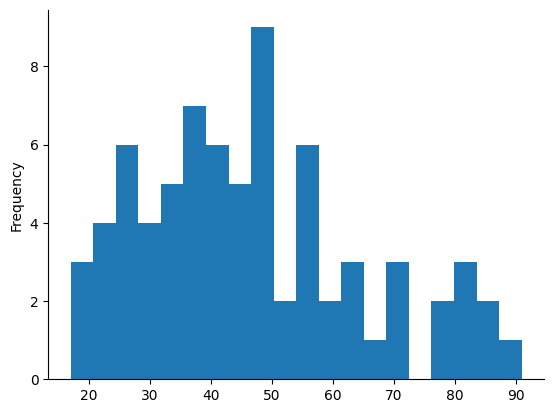

In [7]:
# Now I visualize the raw data as a histogram
from matplotlib import pyplot as plt
data_chemshift['52'].plot(kind='hist', bins=20,)
plt.gca().spines[['top', 'right',]].set_visible(False)

This looks approximately normal to me.
> Add blockquote



In [8]:
#N for normal
with pm.Model() as model_chemshiftN:

    μ = pm.Uniform('μ', lower=40, upper=60)

    σ = pm.Normal('σ', sigma=5)

    #our fancy new likelihood, with two priors
    Y = pm.Normal('Y', mu = μ, sigma = σ, observed=data_chemshift)
    idata_chemshiftN = pm.sample()

Output()

Output()

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

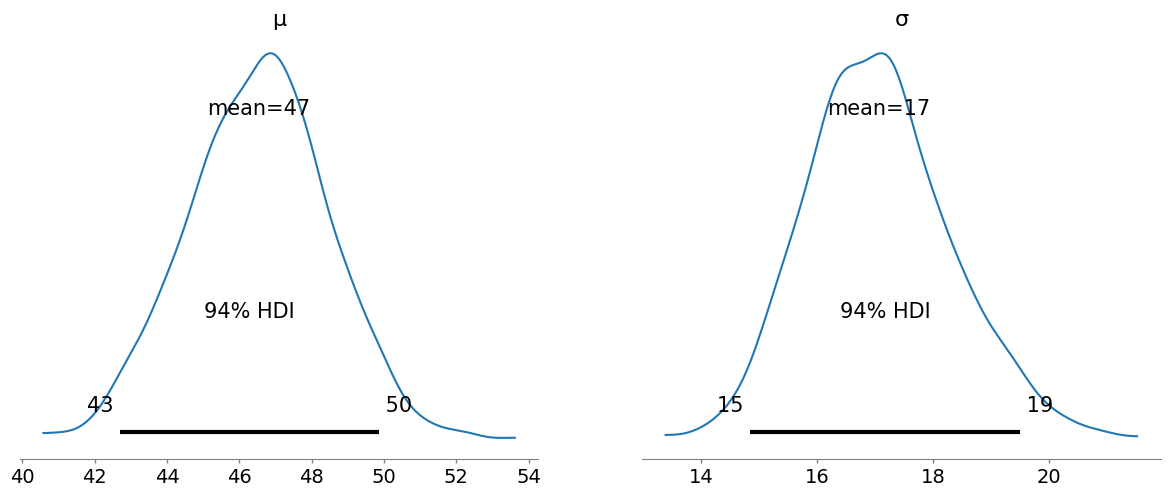

In [9]:
az.plot_posterior(idata_chemshiftN)

array([[<Axes: >, None],
       [<Axes: xlabel='μ', ylabel='σ'>, <Axes: >]], dtype=object)

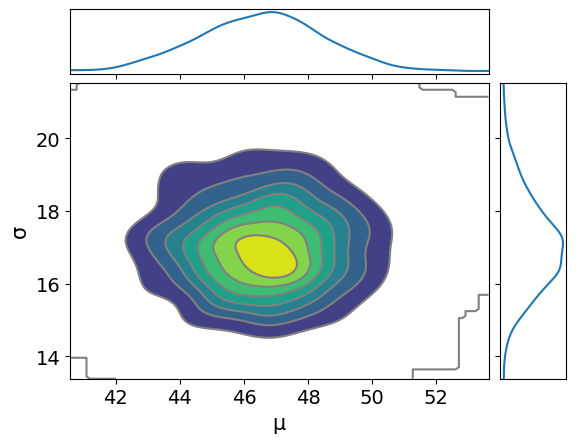

In [10]:
az.plot_pair(idata_chemshiftN, kind="kde", marginals=True)

In [11]:
pm.sample_posterior_predictive(idata_chemshiftN, model=model_chemshiftN, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

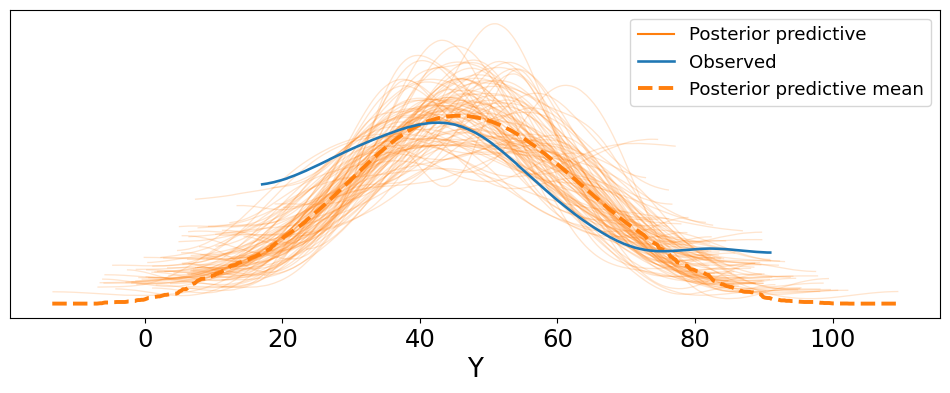

In [12]:
az.plot_ppc(idata_chemshiftN, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

The Normal distribution seems to match the posterior predictive mean pretty well.

One reason I believe it worked well is because the data seemed to cluster symetrically around a central value. In Djokovic's case, his number of first serves per match hovers around a consistent mean (approximately 45-50) serves, which suggests that most of his performances are relatively consistent, with occasional deviations, making the Normal distribution a natural choice. Even though real-world data can sometimes have slight deviations from perfect normality, the Normal distribution is robust enough to handle small deviations while still providing accurate modeling for the bulk of the data.